<a href="https://colab.research.google.com/github/DavoodSZ1993/Dive_into_Deep_Learning/blob/main/08_modern_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 8.1 Deep Convolutional Neural Networks (AlexNet)

### 8.1.2 AlexNet

In [1]:
!pip install d2l==1.0.0-alpha1.post0 --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.0/93.0 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.0/121.0 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 KB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 52.9 MB/s eta 0:00:00


In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

In [ ]:
class AlexNet(d2l.Classifier):
  def __init__(self, lr=0.1, num_classes=10):
    super().__init__()
    self.save_hyperparameters()

    self.net = nn.Sequential(
        nn.LazyConv2d(96, kernel_size=11, stride=4, padding=1),
        nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2),
        nn.LazyConv2d(256, kernel_size=5, padding=2), nn.ReLU(),
        nn.MaxPool2d(kernel_size=3, stride=2),
        nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
        nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
        nn.LazyConv2d(256, kernel_size=3, padding=1), nn.ReLU(),
        nn.MaxPool2d(kernel_size=3, stride=2), nn.Flatten(),
        nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(p=0.5),
        nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(p=0.5),
        nn.LazyLinear(num_classes))
    self.net.apply(d2l.init_cnn)

In [ ]:
AlexNet().layer_summary((1, 1, 224, 224))

Conv2d output shape:	 torch.Size([1, 96, 54, 54])
ReLU output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Conv2d output shape:	 torch.Size([1, 256, 26, 26])
ReLU output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 256, 12, 12])
ReLU output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 256, 5, 5])
Flatten output shape:	 torch.Size([1, 6400])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1,

### 8.1.3 Training

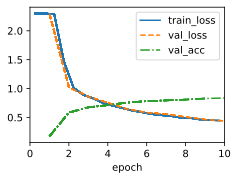

In [ ]:
model = AlexNet(lr=0.01)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)

## 8.2 Networks Using Blocks (VGG)

### 8.2.1 VGG Blocks

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

In [ ]:
def vgg_block(num_convs, out_channels):
  layers = []

  for _ in range(num_convs):
    layers.append(nn.LazyConv2d(out_channels, kernel_size=3, padding=1))
    layers.append(nn.ReLU())

  layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
  return nn.Sequential(*layers)

### 8.2.2 VGG Network

In [ ]:
class VGG(d2l.Classifier):
  def __init__(self, arch, lr=0.1, num_classes=10):
    super().__init__()

    self.save_hyperparameters()
    conv_blks = []
    for (num_convs, out_channels) in arch:
      conv_blks.append(vgg_block(num_convs, out_channels))

    self.net = nn.Sequential(
        *conv_blks, nn.Flatten(),
        nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(p=0.5),
        nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(p=0.5),
        nn.LazyLinear(num_classes))
    self.net.apply(d2l.init_cnn)

In [ ]:
arch = ((1, 64),    # num_conv, out_channels
        (1, 128),
        (2, 256),
        (2, 512),
        (2, 512))

VGG(arch).layer_summary((1, 1, 224, 224))

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Sequential output shape:	 torch.Size([1, 64, 112, 112])
Sequential output shape:	 torch.Size([1, 128, 56, 56])
Sequential output shape:	 torch.Size([1, 256, 28, 28])
Sequential output shape:	 torch.Size([1, 512, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
Flatten output shape:	 torch.Size([1, 25088])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 10])


### 8.2.3 Training

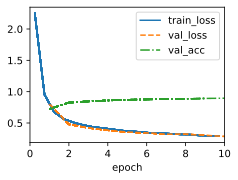

In [ ]:
arch = ((1, 16), (1, 32), (2, 64), (2, 128), (2, 128))

model = VGG(arch, lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

## 8.3 Network in network (NiN)

### 8.3.1 NiN Blocks

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

In [ ]:
def nin_block(out_channels, kernel_size, strides, padding):
  return nn.Sequential(
      nn.LazyConv2d(out_channels, kernel_size, strides, padding), nn.ReLU(),
      nn.LazyConv2d(out_channels, kernel_size=1), nn.ReLU(),
      nn.LazyConv2d(out_channels, kernel_size=1), nn.ReLU())

### 8.3.2 NiN Model

In [ ]:
class NiN(d2l.Classifier):
  def __init__(self, lr=0.1, num_classes=10):
    super().__init__()
    self.save_hyperparameters()

    self.net = nn.Sequential(
        nin_block(96, kernel_size=11, strides=4, padding=0),
        nn.MaxPool2d(3, stride=2),
        nin_block(256, kernel_size=5, strides=1, padding=2),
        nn.MaxPool2d(3, stride=2),
        nin_block(384, kernel_size=3, strides=1, padding=1),
        nn.MaxPool2d(3, stride=2),
        nn.Dropout(0.5),
        nin_block(num_classes, kernel_size=3, strides=1, padding=1),
        nn.AdaptiveAvgPool2d((1, 1)),
        nn.Flatten())
    self.net.apply(d2l.init_cnn)


In [ ]:
NiN().layer_summary((1, 1, 224, 224))

Sequential output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Sequential output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Sequential output shape:	 torch.Size([1, 384, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 384, 5, 5])
Dropout output shape:	 torch.Size([1, 384, 5, 5])
Sequential output shape:	 torch.Size([1, 10, 5, 5])
AdaptiveAvgPool2d output shape:	 torch.Size([1, 10, 1, 1])
Flatten output shape:	 torch.Size([1, 10])


/usr/local/lib/python3.8/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


### 8.3.3 Training

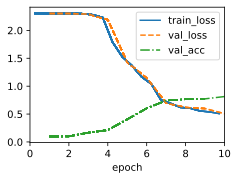

In [ ]:
model = NiN(lr=0.05)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

## 8.4 Multi-Branch Networks (GoogLeNet)

### 8.4.1 Inception Blocks

In [2]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

In [20]:
class Inception(nn.Module):
  def __init__(self, c1, c2, c3, c4, **kwargs):
    super(Inception, self).__init__(**kwargs)

    # Branch 1
    self.b1_1 = nn.LazyConv2d(c1, kernel_size=1)

    # Branch 2
    self.b2_1 = nn.LazyConv2d(c2[0], kernel_size=1)
    self.b2_2 = nn.LazyConv2d(c2[1], kernel_size=3, padding=1)

    # Branch 3
    self.b3_1 = nn.LazyConv2d(c3[0], kernel_size=1)
    self.b3_2 = nn.LazyConv2d(c3[1], kernel_size=5, padding=2)

    # Branch 4
    self.b4_1 = nn.MaxPool2d(kernel_size=3, stride=1, padding=1)
    self.b4_2 = nn.LazyConv2d(c4, kernel_size=1)

  def forward(self, x):
    b1 = F.relu(self.b1_1(x))
    b2 = F.relu(self.b2_2(F.relu(self.b2_1(x))))
    b3 = F.relu(self.b3_2(F.relu(self.b3_1(x))))
    b4 = F.relu(self.b4_2(self.b4_1(x)))
    return torch.cat((b1, b2, b3, b4), dim=1)


### 8.4.2 GoogLeNet Model

In [21]:
class GoogleNet(d2l.Classifier):
  def b1(self):
    return nn.Sequential(
        nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
        nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [22]:
@d2l.add_to_class(GoogleNet)
def b2(self):
  return nn.Sequential(
      nn.LazyConv2d(64, kernel_size=1), nn.ReLU(),
      nn.LazyConv2d(192, kernel_size=3, padding=1), nn.ReLU(),
      nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [23]:
@d2l.add_to_class(GoogleNet)
def b3(self):
  return nn.Sequential(
      Inception(64, (96, 128), (16, 32), 32),
      Inception(128, (128, 192), (32, 96), 64),
      nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [24]:
@d2l.add_to_class(GoogleNet)
def b4(self):
  return nn.Sequential(
      Inception(192, (96, 208), (16, 48), 64),
      Inception(160, (112, 224), (24, 64), 64),
      Inception(128, (128, 256), (24, 64), 64),
      Inception(112, (144, 288), (32, 64), 64),
      Inception(256, (160, 320), (32, 128), 128),
      nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [25]:
@d2l.add_to_class(GoogleNet)
def b5(self):
  return nn.Sequential(
      Inception(256, (160, 320), (32, 128), 128),
      Inception(384, (192, 384), (48, 128), 128),
      nn.AdaptiveAvgPool2d((1, 1)), nn.Flatten())

In [26]:
@d2l.add_to_class(GoogleNet)
def __init__(self, lr=0.1, num_classes=10):
  super(GoogleNet, self).__init__()
  self.save_hyperparameters()

  self.net = nn.Sequential(
      self.b1(),
      self.b2(),
      self.b3(),
      self.b4(),
      self.b5(),
      nn.LazyLinear(num_classes))
  self.net.apply(d2l.init_cnn)

In [29]:
model = GoogleNet().layer_summary((1, 1, 96, 96))

Sequential output shape:	 torch.Size([1, 64, 24, 24])
Sequential output shape:	 torch.Size([1, 192, 12, 12])
Sequential output shape:	 torch.Size([1, 480, 6, 6])
Sequential output shape:	 torch.Size([1, 832, 3, 3])
Sequential output shape:	 torch.Size([1, 1024])
Linear output shape:	 torch.Size([1, 10])


### 8.4.3 Training

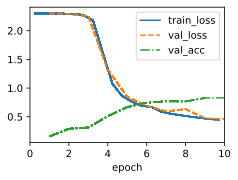

In [28]:
model = GoogleNet(lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

## 8.5 Batch Normalization

### 8.5.3 Implementation from Scratch

In [30]:
import torch
from torch import nn
from d2l import torch as d2l

In [31]:
def batch_norm(X, gamma, beta, moving_mean, moving_var, eps, momentum):
  if not torch.is_grad_enabled():   # Training Mode
    X_hat = (X - moving_mean) / torch.sqrt(moving_var + eps)
  else:
    assert len(X.shape) in (2, 4)
    if len(X.shape) == 2:            # Fully Connetced Layers
      mean = X.mean(dim=0)
      var = ((X - mean) ** 2).mean(dim=0)
    else:
      mean = X.mean(dim=(0, 2, 3), keepdim=True)
      var = ((X - mean) ** 2).mean(dim=(0, 2, 3), keepdim=True)

    X_hat = (X - mean) / torch.sqrt(var + eps)

    moving_mean = (1.0 - momentum) * moving_mean + momentum * mean
    moving_var = (1.0 - momentum) * moving_var + momentum * var

  Y = gamma * X_hat + beta # Scale ans shift
  return Y, moving_mean.data, moving_var.data

In [32]:
class BatchNorm(nn.Module):
  def __init__(self, num_features, num_dims):
    super().__init__()

    if num_dims == 2:
      shape = (1, num_features)     # Fully Connected Layer
    else:
      shape = (1, num_features, 1, 1) # Convolutional layer

    self.gamma = nn.Parameter(torch.ones(shape))
    self.beta = nn.Parameters(torch.zeros(shape))

    self.moving_mean = torch.zeros(shape)
    self.moving_var = torch.ones(shape)

  def forward(self, X):
    if self.moving_mean.device != X.device:
      self.moving_mean = self.moving_mean.to(X.device)
      self.moving_var = self.moving_var.to(X.device)

    Y, self.moving_mean, self.moving_var = batch_norm(
        X, self.gamma, self.beta, self.moving_mean, self.moving_var,
        eps = 1e-5, momentum=0.1)
    return Y